In [12]:
import cv2
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import random
import os
import pickle as pkl

In [13]:
dir = "/Users/kunalshah/Desktop/robotics lab/chess_piece_recog/Chessman-image-dataset/Chess"
categories = ['Bishop','King','Knight','Pawn','Queen','Rook']
img_size = 100
data = []
data1 = []
not_i = 0
skipped = []
for category in categories:
    folder = os.path.join(dir, category)
    label = categories.index(category)
    # print(folder)
    i = 0
    for img in os.listdir(folder):
        img_path = os.path.join(folder, img)
        if img_path.split('.')[1] not in ["jpg", 'png', 'jpeg', 'JPG', 'fcgi', 'webp', 'php']:
            not_i+=1
            skipped.append(img_path)
            continue
        # print(img_path)

        img_arr_color = cv2.imread(img_path)
        img_arr = cv2.cvtColor(img_arr_color, cv2.COLOR_BGR2GRAY)
        img_arr = cv2.resize(img_arr, (img_size, img_size))
        if i >= 76:
            data1.append([img_arr, label])
            i+=1 
            continue
        # plt.imshow(img_arr, cmap = 'gray')
        data.append([img_arr, label])
        i+=1



In [14]:
random.shuffle(data)

Knight


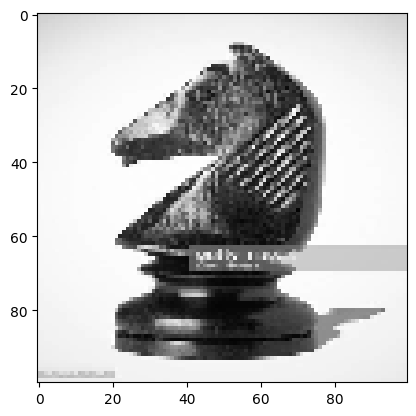

In [15]:
i = 105
plt.imshow(data[i][0], cmap = 'gray')
print(categories[data[i][1]])

In [16]:
x = []
y = []
for features, labels in data:
    x.append(features)
    y.append(labels)

x = torch.tensor(x,dtype=torch.float)
y = torch.tensor(y)




In [17]:
pkl.dump(x, (open('x.pkl','wb')))
pkl.dump(y, (open('y.pkl','wb')))